<a href="https://colab.research.google.com/github/ihssanesrd/Tree-Detection/blob/main/Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detection automatique des coronnes d'arbres en utilisant le Mask R-CNN 

Dans Ce Notebook, Nous entrainons le Mask R-CNN ([de Matterport](https://github.com/matterport/Mask_RCNN)) sur notre propre dataset de coronnes d'arbres et testons par la suite la prediction sur de nouvelles images.



## **1. Installation**

Chargement des modules et fichiers necessaires

In [ ]:
#Specification de la version de Tensorflow qui sera utilisé
%tensorflow_version 1.x
#Installation de la la librarie h5py qui gere la format HDf5
!pip install --upgrade h5py==2.10.0
#Telechargement du Mask RCNN et extraction de fichier
!wget https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
!unzip Mask_RCNN_basic_1.zip
#Chargement des modules necessaires
import sys
sys.path.append("/content/Mask_RCNN/mrcnn")
from m_rcnn import *
#matplotlib effectue des traitements pour preparer l'affichage du graphique
#Affichage avec la bibliotheque graphique integrer a Notebook
%matplotlib inline

TensorFlow 1.x selected.
     |████████████████████████████████| 2.9 MB 10.8 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
--2022-01-31 06:27:03--  https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
Resolving pysource.com (pysource.com)... 188.114.97.3, 188.114.96.3, 2a06:98c1:3121::3, ...
Connecting to pysource.com (pysource.com)|188.114.97.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1282557 (1.2M) [application/zip]
Saving to: ‘Mask_RCNN_basic_1.zip’

Mask_RCNN_basic_1.z 100%[===================>]   1.22M  --.-KB/s    in 0.02s   

2022-01-31 06:27:03 (51.3 MB/s) - ‘Mask_RCNN_basic_1.zip’ saved [1282557/1282557]

Archive:  Mask_RCNN_basic_1.zip
   creating: Mask_RCNN/
  inflating: Mask_RCNN/.gitignore    
   creating: Mask_RCNN/assets/
   creating: Mask_RCNN/images/
  inflating: Mask_RCNN/LICENSE       
  inflating: Mask_RCNN/MANIFEST.in   
   crea

Using TensorFlow backend.


... done downloading pretrained model!


In [ ]:
!nvidia-smi

Mon Jan 31 06:28:01 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## **2. Preparation de la Dataset**

Chargement des images annotés et du fichier json obtenu en phase de preparation de dataset à l'aide https://www.makesense.ai/


In [ ]:
###############################
########Extract Images#########
###############################
images_path = "dataset.zip"
annotations_path = "annotations.json"
#extraction des images de dataset.zip dans le repertoire qui sera crée par la fonction predifinis
extract_images(os.path.join("/content/",images_path), "/content/dataset")

Extracted: 18 images


In [ ]:
#load_image_dataset est une fonction predefinie dans le fichier m_rcnn.py 
#qui permet de separer la dataset en dataset en 90% d'image pour entrainement et 10% pour validation
dataset_train = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "train")
dataset_val = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "val")

#Class_number retourne le nombre de classe definis dans notre dataset qui est dans notre cas une seule(crown)
class_number = dataset_train.count_classes()
#afficher le nombre d'images utiliser pour l'entrainement et le nombre d'images utilisés pour la validation 
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  /content/annotations.json
Annotation json path:  /content/annotations.json
Train: 17
Validation: 2
Classes: 1


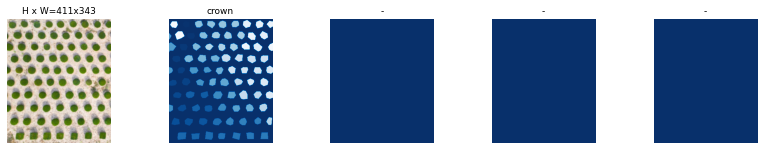

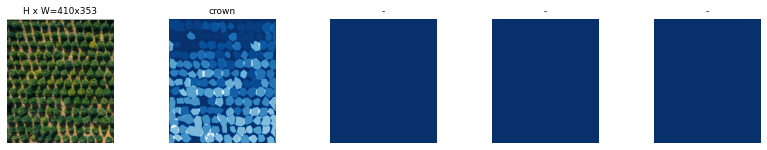

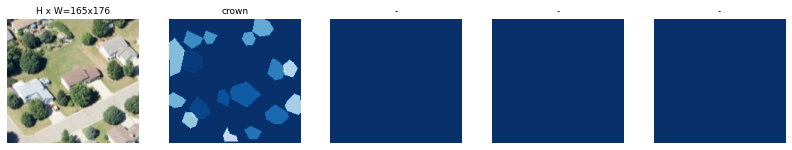

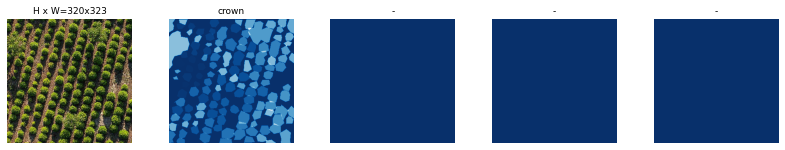

In [ ]:
#Affichage aleatoire des images qui seront utilisés en phase d'entrainement
#Les images sont affichés avec leurs masques d'annotation 
#les images restantes n'affichent rien puiqu'on possede une seule classe seulement
display_image_samples(dataset_train)

##**3. Entrainement**

Entrainement du Mask RCNN sur la Dataset.

In [ ]:
#Configuration
#Initialisation de la configuration (herite de la classe Config) 
config = CustomConfig(class_number)
#config.display()
#definir les hyperparametres pour la creation de l'architecture du modele RCNN(epochs,min_confidence,number of steps per epoch,etc)
model = load_training_model(config)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead
/content/Mask_RCNN/mask_rcnn_coco.h5


In [ ]:
# Debut de l'entrainement
#Entrainement du modele(nous utilisons 5 epoches)
#train_head is a fuction to avoid training the last layers
#pour chaque photo 5 couches de convolution et 5 de pooling (fpn_c5p5),ensuite 4 conv et 4pooling,etc
#Cette phase necessite une longue durée
#epochs=5, steps per epoch = 500
#donc le modele passera sur chaque image 2500 fois
train_head(model, dataset_train, dataset_train, config)
#commentaire: en evaluant le taux d'erreur on peut dire que notre modele est bon


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/Mask_RCNN/logs/object20220130T1058/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn

## **4. Detection (tester le modele sur une image aleatoire)**

In [ ]:
# Load Test Model
# The latest trained model will be loaded
#charger le modele deja entrainée pour le test
#inference_config est une variable qui contient les nouveaux hyperparametres apres entrainement du modele
test_model, inference_config = load_test_model(class_number)



Instructions for updating:
Use `tf.cast` instead.
Loading weights from  /content/Mask_RCNN/logs/object20220129T2108/mask_rcnn_object_0005.h5
Re-starting from epoch 5


In [ ]:
# Load Image
#lecture et chargement d'image
img = cv2.imread("/content/WhatsApp Image 2022-01-29 at 18.59.06.jpeg")

#inference_model est le modele utu=ilisée pour la prediction
test_model, inference_config = load_inference_model(1,"/content/Mask_RCNN/logs/object20220129T2108/mask_rcnn_object_0005.h5")
#....
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect results
#test_model.detect retourne la prediction du masque
r = test_model.detect([image])[0]
#pou mettre une couleur pour chaque tree
colors = random_colors(80)

Loading weights from  /content/Mask_RCNN/logs/object20220129T2108/mask_rcnn_object_0005.h5
Re-starting from epoch 5


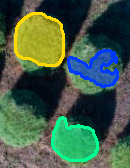

In [ ]:
from google.colab.patches import cv2_imshow
from visualize import random_colors, get_mask_contours, draw_mask
# Get Coordinates and show it on the image
object_count = len(r["class_ids"])
for i in range(object_count):
    # 1. Mask
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    for cnt in contours:
        cv2.polylines(img, [cnt], True, colors[i], 2)
        img = draw_mask(img, [cnt], colors[i])

cv2_imshow(img)